In [2]:
# Import packages and Functions.py
import sys
sys.path.append('../') 
from Functions import * 

In [3]:
 # Matrix Y, containing all possilbe edges
 Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

alpha = 5 # Change alpha here

# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
mu = np.zeros(2)
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]])
num_samples = 4

In [4]:
# Define Loss_function as in Functions.py but only take the input point and not Y-matrix
def Loss_function(point):
    alpha = 5 
    result = 0

    for m in range(len(Y)): 
        connection = Y[m][0]
        point_1 = point[Y[m][1]]
        point_2 = point[Y[m][2]]
        distance = np.linalg.norm(point_1 - point_2) ** 2 
        sigmoid_value = 1 / (1 + np.exp(-connection * (alpha - distance))) 
        result += np.log(sigmoid_value) 

    return result

In [5]:
hist = np.zeros(1000) # Number of test
for n in range(1000):
    point = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    # Use Autograd
    grad_func = value_and_grad(Loss_function)
    Autograd = grad_func(point)

    # Use Gradient_function
    grad_matrix = np.array([[Gradient_function(1,0,Y,point), Gradient_function(1,1,Y,point)],
                            [Gradient_function(2,0,Y,point), Gradient_function(2,1,Y,point)],
                            [Gradient_function(3,0,Y,point), Gradient_function(3,1,Y,point)],
                            [Gradient_function(4,0,Y,point), Gradient_function(4,1,Y,point)]])
    # Caculate the error
    hist[n] = np.sum(Autograd[1][1]-grad_matrix[0]+Autograd[1][2]-grad_matrix[1]+Autograd[1][3]-grad_matrix[2]+Autograd[1][4]-grad_matrix[3])


(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          4.,   2.,  18.,  15.,  51.,  30., 170., 358., 197.,  52.,  51.,
         14.,  20.,   3.,   5.,   3.,   1.,   1.,   2.]),
 array([-1.24344979e-14, -1.17646633e-14, -1.10948288e-14, -1.04249942e-14,
        -9.75515964e-15, -9.08532508e-15, -8.41549053e-15, -7.74565597e-15,
        -7.07582141e-15, -6.40598685e-15, -5.73615229e-15, -5.06631774e-15,
        -4.39648318e-15, -3.72664862e-15, -3.05681406e-15, -2.38697950e-15,
        -1.71714494e-15, -1.04731039e-15, -3.77475828e-16,  2.92358730e-16,
         9.62193288e-16,  1.63202785e-15,  2.30186240e-15,  2.97169696e-15,
         3.64153152e-15,  4.31136608e-15,  4.98120064e-15,  5.65103520e-15,
         6.32086975e-15,  6.99070431e-15,  7.66053887e-15]),
 <BarContainer object of 30 artists>)

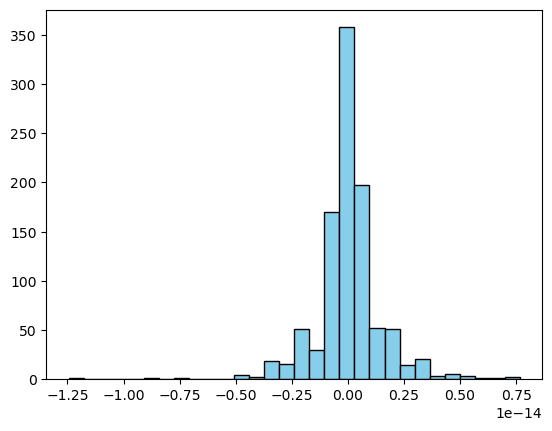

In [6]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')